# [DART(전자공시시스템)](https://coding-kindergarten.tistory.com/85)
- DART(Data Analysis, Retrieval and Transfer System)은 데이터 분석, 검색 및 전송 시스템이라는 뜻을 가진, 대한민국 금융감독원에서 운영하는 기업정보 전자공시시스템입니다.
- 코스피, 코스닥 시장에 상장된 주식회사부터 비상장 주식회사까지 다양한 회사들이 회사의 경영상태에 대한 공시를 하는 사이트입니다. 이 시스템으로 인해 투자자 누구나 기업에 관한 정보를 손쉽게 얻을 수 있습니다.

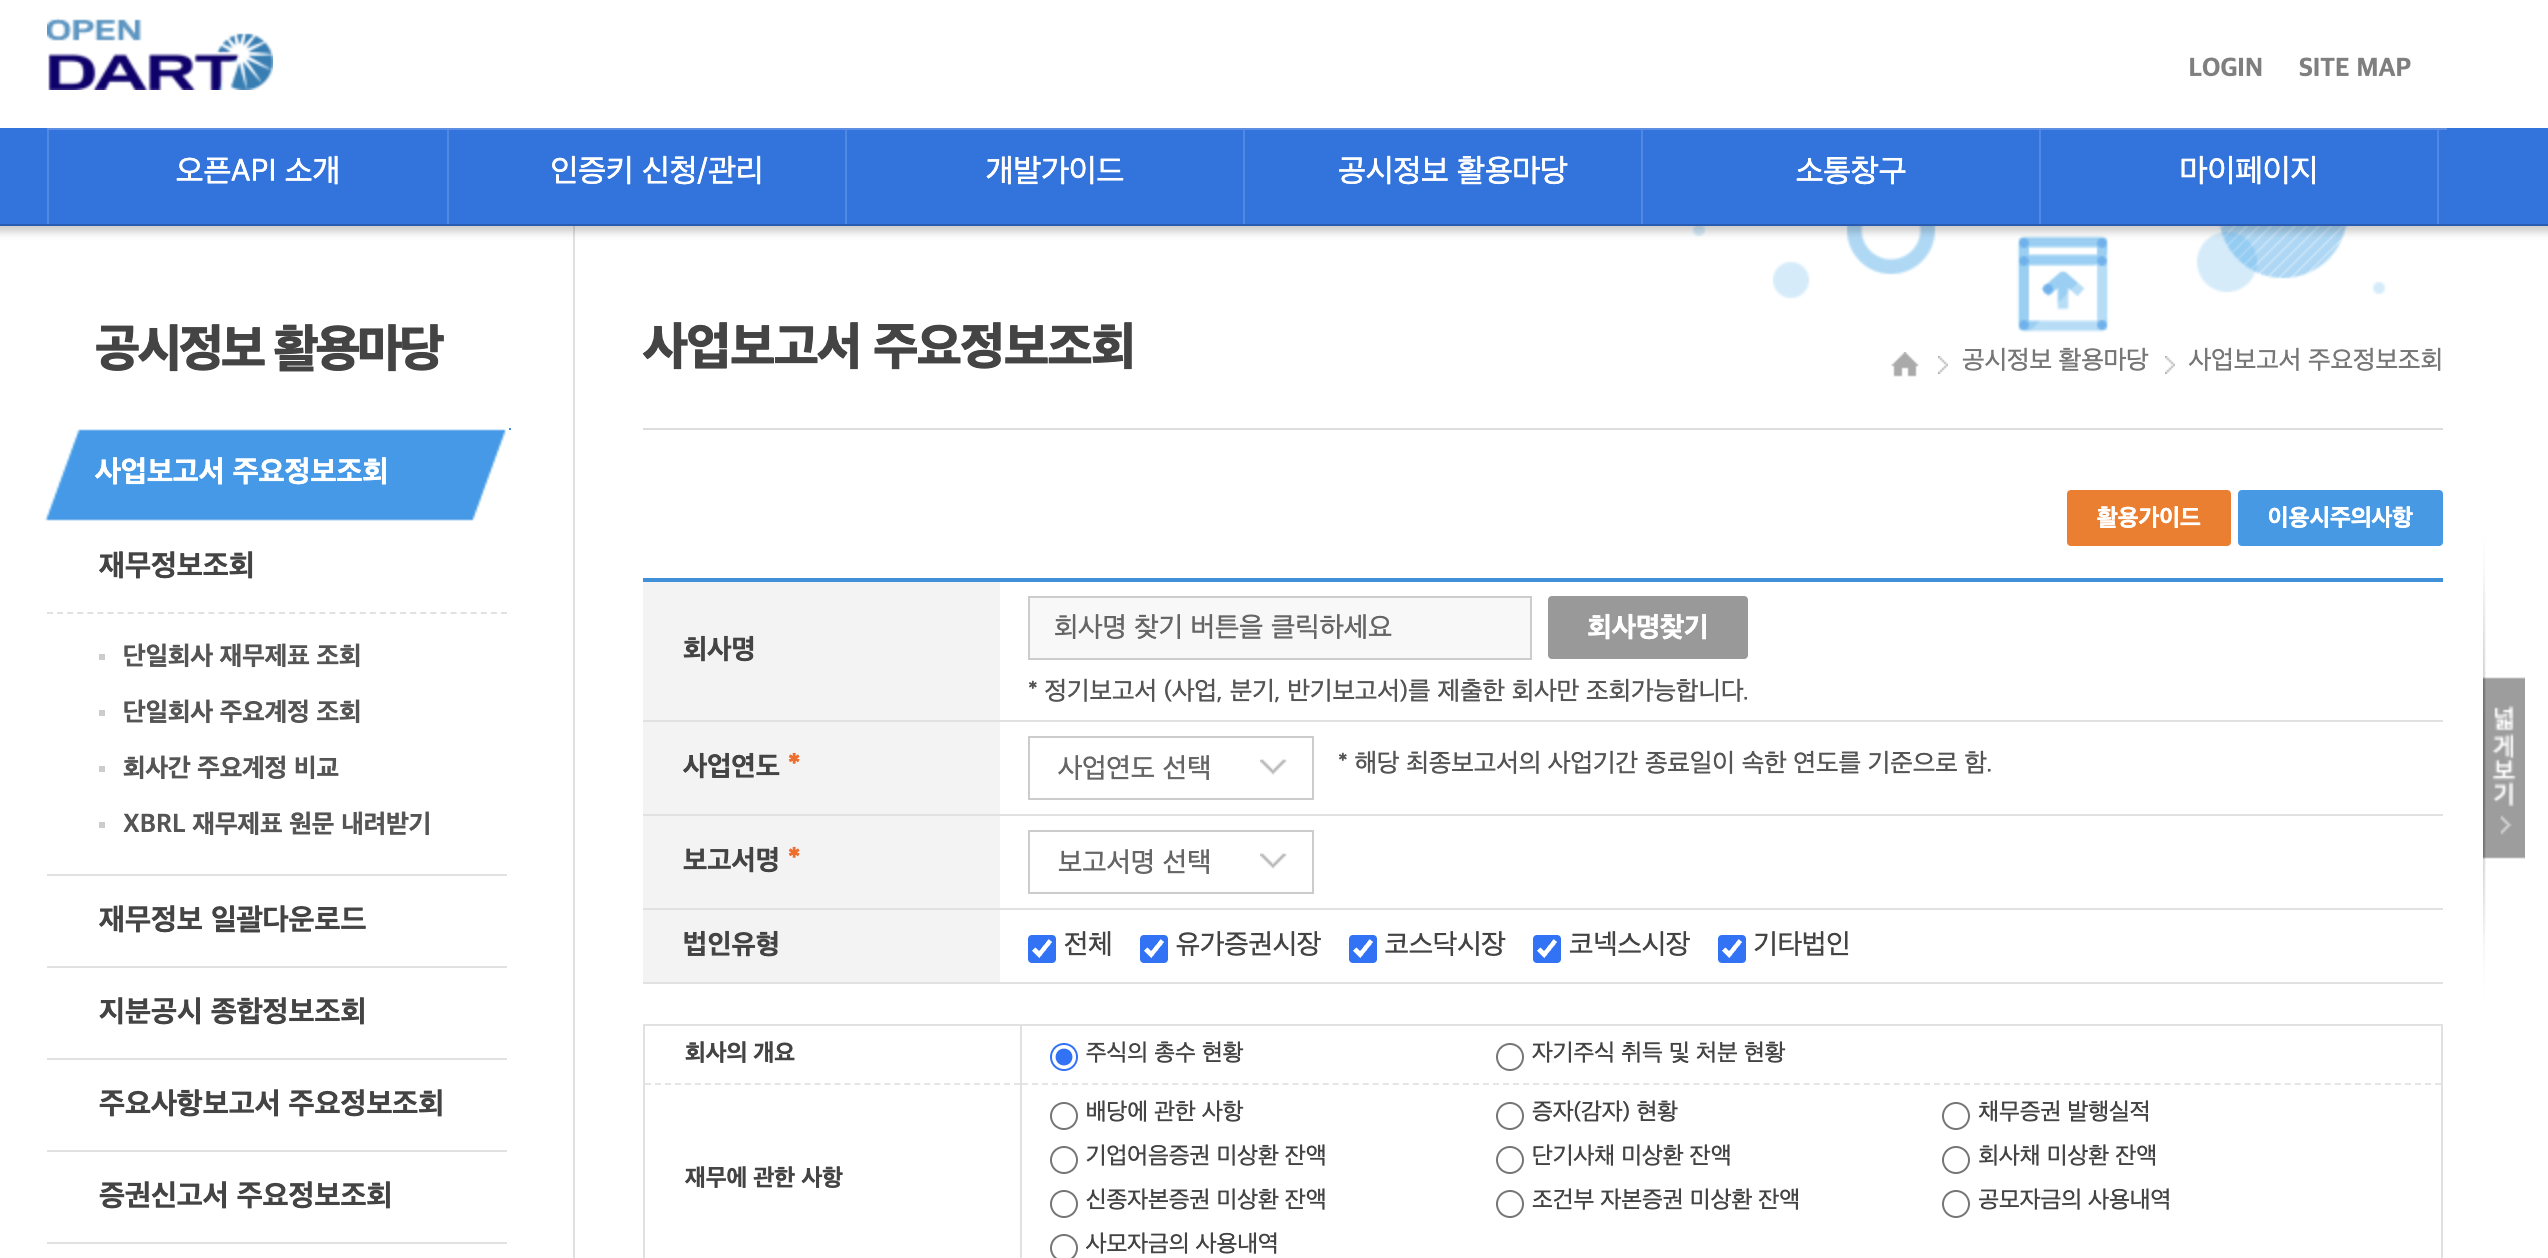

## DART API 인증키 신청 
- https://opendart.fss.or.kr/uss/umt/EgovMberInsertView.do

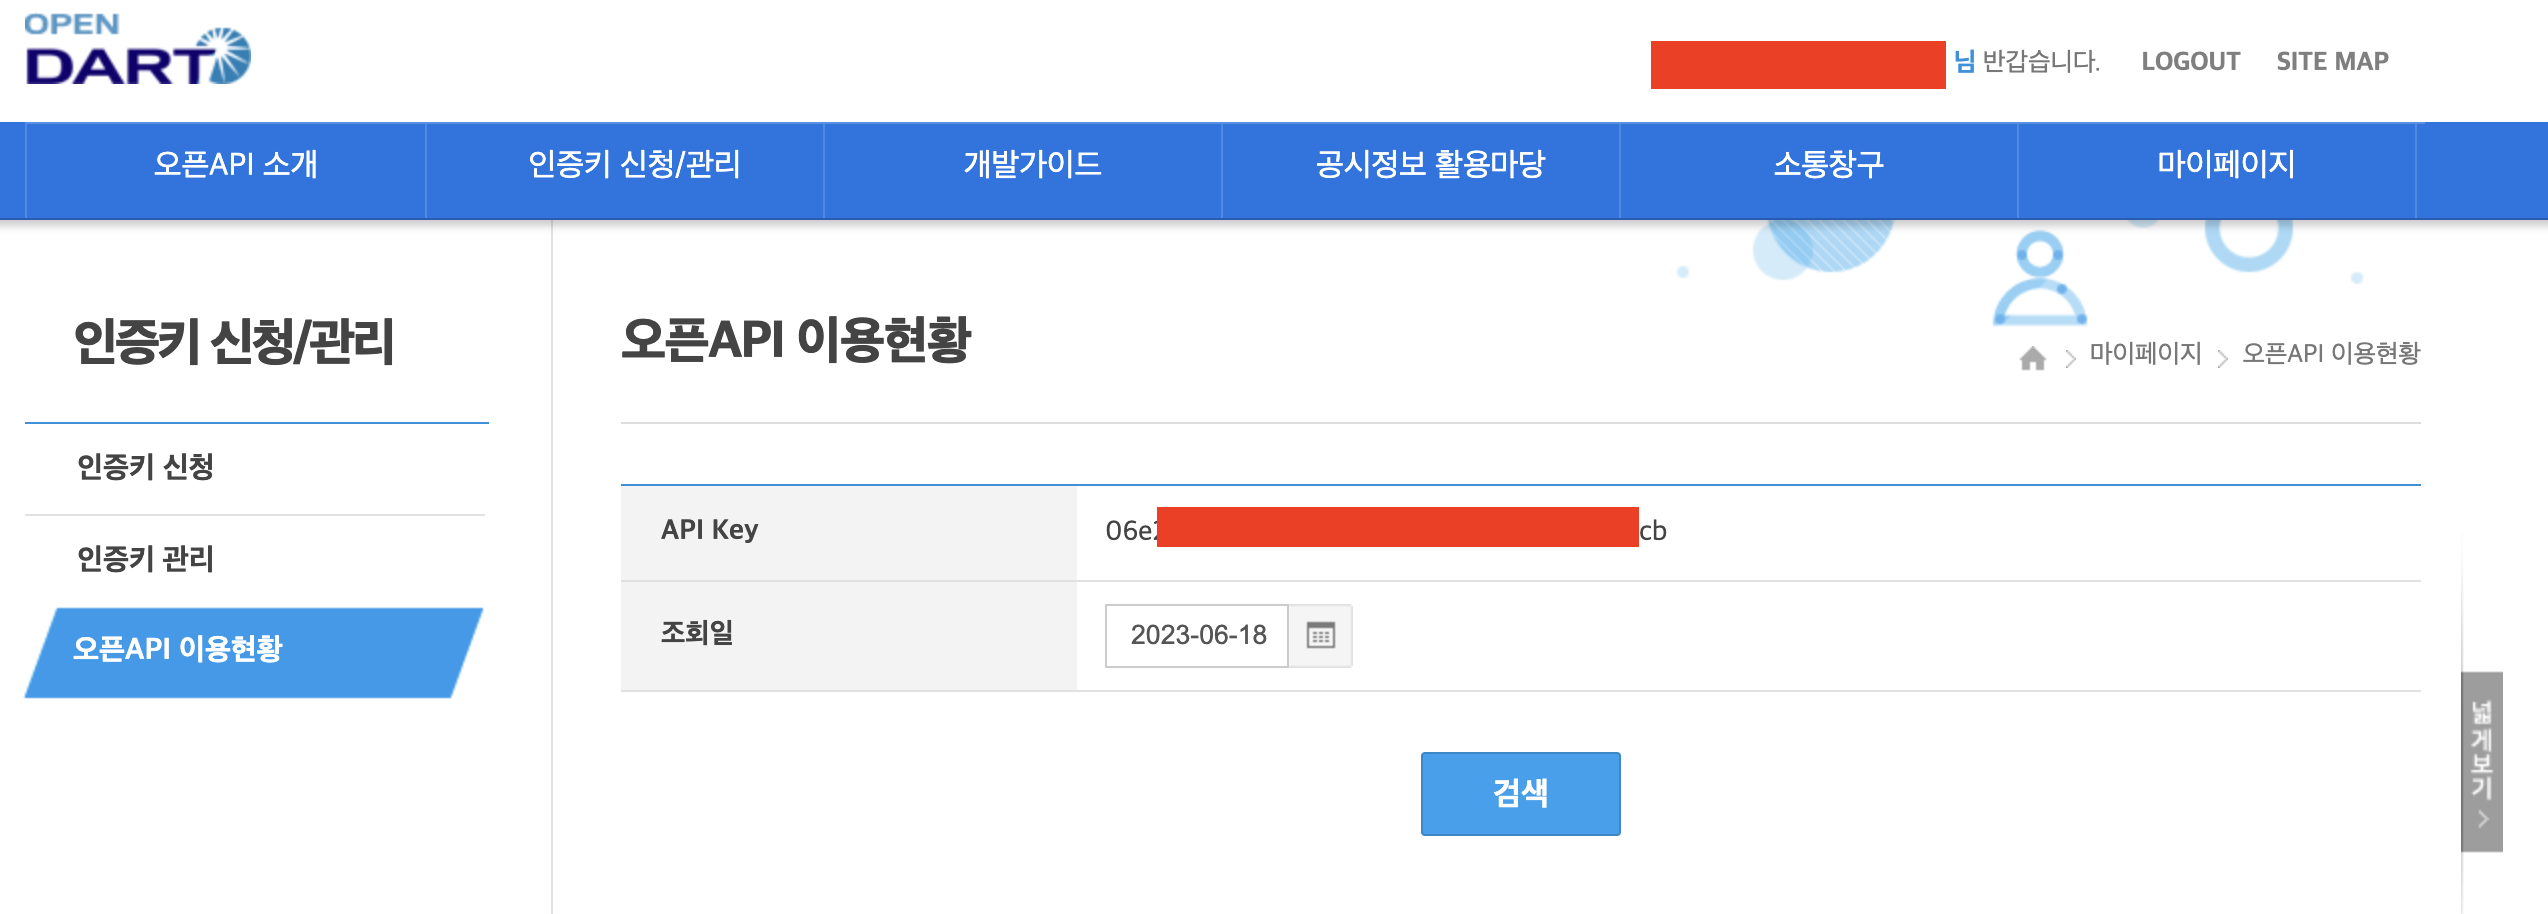

## [DART 모듈 설치](https://dart-fss.readthedocs.io/en/latest/index.html)
대한민국 금융감독원에서 운영하는 다트(DART) 사이트 크롤링 및 재무제표 추출을 위한 라이브러리

- Installation   
    ```shell
    $ pip install dart-fss
    ```

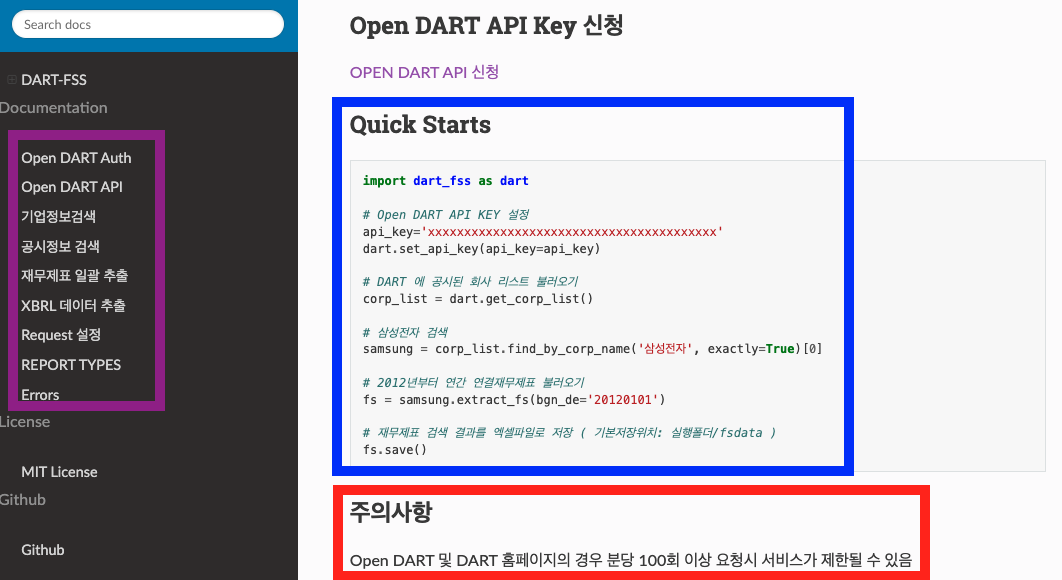

# 코드

In [13]:
import os 
import dart_fss as dart 

In [14]:
dart.set_api_key(api_key=os.environ['DART_PSS_API_KEY'])

# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

print(f'공시된 기업 전체 수: {len(corp_list)}')

공시된 기업 전체 수: 101347


In [22]:
corp_list[0]

Label,Data
corp_code,00434003
corp_name,다코
stock_code,None
modify_date,20170630


In [24]:
corp_list[0].product

AttributeError: 'Corp' object has no attribute 'product'

In [23]:
corp_list.find_by_corp_name('삼성전자', exactly=True)[0]

Label,Data
corp_code,00126380
corp_name,삼성전자
stock_code,005930
modify_date,20230110
sector,통신 및 방송 장비 제조업
product,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(디스플레이) 제품, 영상 및 음향기기 제조(영상기기) 제품 등"
corp_cls,Y


In [25]:
corp_list.find_by_corp_name('삼성전자', exactly=True)[0].product

'통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품,  전자부품 제조(디스플레이) 제품, 영상 및 음향기기 제조(영상기기) 제품 등'

In [31]:
save_corps_Y = [] # 코스피 기업정보 KOSPI
for corp in corp_list:
    try:
        if corp.corp_cls == "Y": # 코스피 기업정보 KOSPI
            save_corps_Y.append(corp.corp_name)
    except:
        pass 

print(f'len(save_corps_Y): {len(save_corps_Y)} / len(corp_list): {len(corp_list)}')

len(save_corps_Y): 833 / len(corp_list): 101347


In [32]:
save_corps_Y[:10]

['맵스리얼티1',
 '맥쿼리인프라',
 '우진',
 '대동',
 '삼화콘덴서공업',
 '유니온',
 '우진플라임',
 '페이퍼코리아',
 '넥센',
 '서연이화']

In [39]:
default_path = "../data/meta/KOSPI/"

for corp in save_corps_Y:
    search_path = default_path + corp
    if not os.path.exists(search_path):
        os.makedirs(search_path)

In [ ]:
# checking if the directory demo_folder 
# exist or not.
if not os.path.exists("path/to/demo_folder"):
    # if the demo_folder directory is not present 
    # then create it.
    os.makedirs("path/to/demo_folder")

## [기업 정보 조회](https://dart-fss.readthedocs.io/en/latest/dart_corp.html)

### get_corp_list

In [14]:
dart.set_api_key(api_key=os.environ['DART_PSS_API_KEY'])

# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

print(f'공시된 기업 전체 수: {len(corp_list)}')

공시된 기업 전체 수: 101347


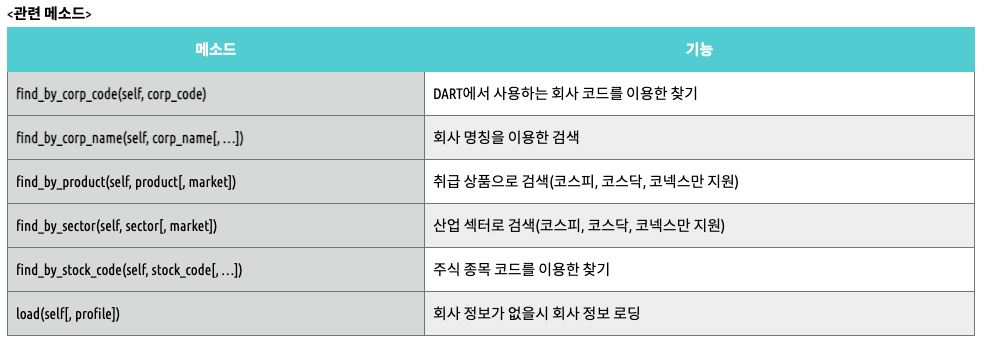

In [15]:
corp_list.find_by_corp_name('삼성전자', exactly=True)[0]

Label,Data
corp_code,00126380
corp_name,삼성전자
stock_code,005930
modify_date,20230110
sector,통신 및 방송 장비 제조업
product,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(디스플레이) 제품, 영상 및 음향기기 제조(영상기기) 제품 등"
corp_cls,Y


In [16]:
corp_list.find_by_corp_code('00126380')

Label,Data
corp_code,00126380
corp_name,삼성전자
stock_code,005930
modify_date,20230110
sector,통신 및 방송 장비 제조업
product,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(디스플레이) 제품, 영상 및 음향기기 제조(영상기기) 제품 등"
corp_cls,Y


In [18]:
samsung = corp_list.find_by_stock_code('005930')
samsung

Label,Data
corp_code,00126380
corp_name,삼성전자
stock_code,005930
modify_date,20230110
sector,통신 및 방송 장비 제조업
product,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(디스플레이) 제품, 영상 및 음향기기 제조(영상기기) 제품 등"
corp_cls,Y


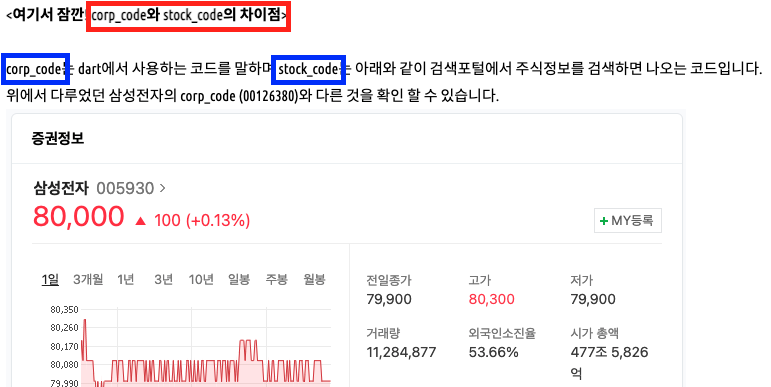

### search_filings

In [19]:
# 2019년 3월 1일부터 2019년 5월 31일까지 삼성전자의 모든 공시 정보 조회
samsung.search_filings(bgn_de='20190301', end_de='20190531')

{'page_count': 10,
 'page_no': 1,
 'report_list': [{'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20190531',
                  'rcp_no': '20190531000190',
                  'report_nm': '대규모기업집단현황공시[연1회공시및1/4분기용(대표회사)]',
                  'rm': '공',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '고동진',
                  'rcept_dt': '20190529',
                  'rcp_no': '20190529000121',
                  'report_nm': '임원ㆍ주요주주특정증권등소유상황보고서',
                  'rm': '',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '이원진',
                  'rcept_dt': '20190524',
                  'rcp_no': '20190524000105',
                  'report_nm': '임원ㆍ주요주주특정증권등소유상황보고서',
                  'rm': '',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20190517',
                  'rcp_no': '20190517800402',
                  'report_nm': '최대주주등소유주식변동신고서',
                  'rm': '유',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '김기남',
                  'rcept_dt': '20190517',
                  'rcp_no': '20190517000061',
                  'report_nm': '임원ㆍ주요주주특정증권등소유상황보고서',
                  'rm': '',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '강봉구',
                  'rcept_dt': '20190516',
                  'rcp_no': '20190516000064',
                  'report_nm': '[기재정정]임원ㆍ주요주주특정증권등소유상황보고서',
                  'rm': '',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '강봉구',
                  'rcept_dt': '20190516',
                  'rcp_no': '20190516000050',
                  'report_nm': '임원ㆍ주요주주특정증권등소유상황보고서',
                  'rm': '정',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20190515',
                  'rcp_no': '20190515001605',
                  'report_nm': '분기보고서 (2019.03)',
                  'rm': '',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20190515',
                  'rcp_no': '20190515001258',
                  'report_nm': '동일인등출자계열회사와의상품ㆍ용역거래변경',
                  'rm': '공',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20190515',
                  'rcp_no': '20190515001246',
                  'report_nm': '동일인등출자계열회사와의상품ㆍ용역거래변경',
                  'rm': '공',
                  'stock_code': '005930'}],
 'total_count': 40,
 'total_page': 4}

In [20]:
# 2010년 1월 1일부터 현재까지 모든 사업보고서 검색
samsung.search_filings(bgn_de='20100101', pblntf_detail_ty='a001')

{'page_count': 10,
 'page_no': 1,
 'report_list': [{'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20230307',
                  'rcp_no': '20230307000542',
                  'report_nm': '사업보고서 (2022.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20220308',
                  'rcp_no': '20220308000798',
                  'report_nm': '사업보고서 (2021.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20210309',
                  'rcp_no': '20210309000744',
                  'report_nm': '사업보고서 (2020.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20200330',
                  'rcp_no': '20200330003851',
                  'report_nm': '사업보고서 (2019.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20190401',
                  'rcp_no': '20190401004781',
                  'report_nm': '사업보고서 (2018.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20180402',
                  'rcp_no': '20180402005019',
                  'report_nm': '사업보고서 (2017.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20170331',
                  'rcp_no': '20170331004518',
                  'report_nm': '사업보고서 (2016.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20160330',
                  'rcp_no': '20160330003536',
                  'report_nm': '사업보고서 (2015.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20150331',
                  'rcp_no': '20150331002915',
                  'report_nm': '사업보고서 (2014.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20140331',
                  'rcp_no': '20140331002427',
                  'report_nm': '사업보고서 (2013.12)',
                  'rm': '연',
                  'stock_code': '005930'}],
 'total_count': 14,
 'total_page': 2}

In [21]:
# 2010년 1월 1일부터 현재까지 모든 사업보고서의 최종보고서만 검색
samsung.search_filings(bgn_de='20100101', pblntf_detail_ty='a001', last_reprt_at='Y')

{'page_count': 10,
 'page_no': 1,
 'report_list': [{'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20230307',
                  'rcp_no': '20230307000542',
                  'report_nm': '사업보고서 (2022.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20220308',
                  'rcp_no': '20220308000798',
                  'report_nm': '사업보고서 (2021.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20210309',
                  'rcp_no': '20210309000744',
                  'report_nm': '사업보고서 (2020.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20200330',
                  'rcp_no': '20200330003851',
                  'report_nm': '사업보고서 (2019.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20190401',
                  'rcp_no': '20190401004781',
                  'report_nm': '사업보고서 (2018.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20180402',
                  'rcp_no': '20180402005019',
                  'report_nm': '사업보고서 (2017.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20170331',
                  'rcp_no': '20170331004518',
                  'report_nm': '사업보고서 (2016.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20160330',
                  'rcp_no': '20160330003536',
                  'report_nm': '사업보고서 (2015.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20150331',
                  'rcp_no': '20150331002915',
                  'report_nm': '사업보고서 (2014.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20140331',
                  'rcp_no': '20140331002427',
                  'report_nm': '사업보고서 (2013.12)',
                  'rm': '연',
                  'stock_code': '005930'}],
 'total_count': 14,
 'total_page': 2}

In [22]:
# 2010년 1월 1일부터 현재까지 사업보고서, 반기보고서, 분기보고서 검색
samsung.search_filings(bgn_de='20100101', pblntf_detail_ty=['a001', 'a002', 'a003'])

{'page_count': 10,
 'page_no': 1,
 'report_list': [{'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20230515',
                  'rcp_no': '20230515002335',
                  'report_nm': '분기보고서 (2023.03)',
                  'rm': '',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20230307',
                  'rcp_no': '20230307000542',
                  'report_nm': '사업보고서 (2022.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20221114',
                  'rcp_no': '20221114001832',
                  'report_nm': '분기보고서 (2022.09)',
                  'rm': '',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20220816',
                  'rcp_no': '20220816001711',
                  'report_nm': '반기보고서 (2022.06)',
                  'rm': '',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20220516',
                  'rcp_no': '20220516001751',
                  'report_nm': '분기보고서 (2022.03)',
                  'rm': '',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20220308',
                  'rcp_no': '20220308000798',
                  'report_nm': '사업보고서 (2021.12)',
                  'rm': '연',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20211115',
                  'rcp_no': '20211115001965',
                  'report_nm': '분기보고서 (2021.09)',
                  'rm': '',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20210817',
                  'rcp_no': '20210817001416',
                  'report_nm': '반기보고서 (2021.06)',
                  'rm': '',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20210517',
                  'rcp_no': '20210517001185',
                  'report_nm': '분기보고서 (2021.03)',
                  'rm': '',
                  'stock_code': '005930'},
                 {'corp_cls': 'Y',
                  'corp_code': '00126380',
                  'corp_name': '삼성전자',
                  'flr_nm': '삼성전자',
                  'rcept_dt': '20210309',
                  'rcp_no': '20210309000744',
                  'report_nm': '사업보고서 (2020.12)',
                  'rm': '연',
                  'stock_code': '005930'}],
 'total_count': 55,
 'total_page': 6}

## [공시정보 검색](https://dart-fss.readthedocs.io/en/latest/dart_corp.html)

### search

In [23]:
import dart_fss as dart

# 2019년 1월 1일부터 2019년 3월 31일까지 검색 (crp_cd 미지정시 최대 3개월만 검색가능)
reports = dart.filings.search(bgn_de='20190101', end_de='20190331')
reports

{'page_count': 10,
 'page_no': 1,
 'report_list': [{'corp_cls': 'N',
                  'corp_code': '01109122',
                  'corp_name': '에스엘테라퓨틱스',
                  'flr_nm': '에스엘테라퓨틱스',
                  'rcept_dt': '20190314',
                  'rcp_no': '20190314000797',
                  'report_nm': '[첨부추가]주요사항보고서(전환사채권발행결정)',
                  'rm': '정',
                  'stock_code': '258540'},
                 {'corp_cls': 'K',
                  'corp_code': '00363510',
                  'corp_name': '소니드',
                  'flr_nm': '소니드',
                  'rcept_dt': '20190228',
                  'rcp_no': '20190228901313',
                  'report_nm': '[첨부추가]증권발행결과(자율공시)(제19회차 CB)',
                  'rm': '코',
                  'stock_code': '060230'},
                 {'corp_cls': 'Y',
                  'corp_code': '00872984',
                  'corp_name': '이마트',
                  'flr_nm': '이마트',
                  'rcept_dt': '20190315',
                  'rcp_no': '20190315000687',
                  'report_nm': '[첨부추가]주요사항보고서(풋백옵션등계약체결결정)',
                  'rm': '정',
                  'stock_code': '139480'},
                 {'corp_cls': 'E',
                  'corp_code': '00453804',
                  'corp_name': '엔에이치아문디자산운용',
                  'flr_nm': '엔에이치아문디자산운용',
                  'rcept_dt': '20190328',
                  'rcp_no': '20190328000051',
                  'report_nm': '증권발행실적보고서(집합투자증권)(NH-Amundi우량채권형증권자투자신탁[채권])',
                  'rm': '',
                  'stock_code': ''},
                 {'corp_cls': 'E',
                  'corp_code': '00453804',
                  'corp_name': '엔에이치아문디자산운용',
                  'flr_nm': '엔에이치아문디자산운용',
                  'rcept_dt': '20190328',
                  'rcp_no': '20190328000055',
                  'report_nm': '증권발행실적보고서(집합투자증권)(NH-Amundi글로벌회사채증권자투자신탁(UH)[채권-재간접형])',
                  'rm': '',
                  'stock_code': ''},
                 {'corp_cls': 'E',
                  'corp_code': '00453804',
                  'corp_name': '엔에이치아문디자산운용',
                  'flr_nm': '엔에이치아문디자산운용',
                  'rcept_dt': '20190328',
                  'rcp_no': '20190328000057',
                  'report_nm': '증권발행실적보고서(집합투자증권)(NH-Amundi인디아포르테증권자투자신탁[주식])',
                  'rm': '',
                  'stock_code': ''},
                 {'corp_cls': 'E',
                  'corp_code': '00453804',
                  'corp_name': '엔에이치아문디자산운용',
                  'flr_nm': '엔에이치아문디자산운용',
                  'rcept_dt': '20190328',
                  'rcp_no': '20190328000063',
                  'report_nm': '증권발행실적보고서(집합투자증권)(NH-Amundi글로벌회사채증권자투자신탁(H)[채권-재간접형])',
                  'rm': '',
                  'stock_code': ''},
                 {'corp_cls': 'E',
                  'corp_code': '00453804',
                  'corp_name': '엔에이치아문디자산운용',
                  'flr_nm': '엔에이치아문디자산운용',
                  'rcept_dt': '20190328',
                  'rcp_no': '20190328000067',
                  'report_nm': '증권발행실적보고서(집합투자증권)(NH-Amundi성장중소형주10증권자투자신탁[채권혼합])',
                  'rm': '',
                  'stock_code': ''},
                 {'corp_cls': 'E',
                  'corp_code': '00453804',
                  'corp_name': '엔에이치아문디자산운용',
                  'flr_nm': '엔에이치아문디자산운용',
                  'rcept_dt': '20190328',
                  'rcp_no': '20190328000070',
                  'report_nm': '증권발행실적보고서(집합투자증권)(NH-Amundi퇴직연금중소형주증권자(子)투자신탁1호[채권혼합])',
                  'rm': '',
                  'stock_code': ''},
                 {'corp_cls': 'K',
                  'corp_code': '00352499',
                  'corp_name': '링네트',
                  'flr_nm': '링네트',
                  'rcept_dt': '20190313',
                  'rcp_no': '20190313000347',
                  'report_nm': '[첨부추가]주요사항보고서(자기주식취득신탁계약체결결정)',
                  'rm': '정',
                  'stock_code': '042500'}],
 'total_count': 58763,
 'total_page

In [25]:
# 2019년 1월 1일부터 2019년 3월 31일까지 검색 (페이지당 표시 건수: 100)
reports = dart.filings.search(bgn_de='20190101', end_de='20190331', page_count=20)
reports

{'page_count': 20,
 'page_no': 1,
 'report_list': [{'corp_cls': 'N',
                  'corp_code': '01109122',
                  'corp_name': '에스엘테라퓨틱스',
                  'flr_nm': '에스엘테라퓨틱스',
                  'rcept_dt': '20190314',
                  'rcp_no': '20190314000797',
                  'report_nm': '[첨부추가]주요사항보고서(전환사채권발행결정)',
                  'rm': '정',
                  'stock_code': '258540'},
                 {'corp_cls': 'K',
                  'corp_code': '00363510',
                  'corp_name': '소니드',
                  'flr_nm': '소니드',
                  'rcept_dt': '20190228',
                  'rcp_no': '20190228901313',
                  'report_nm': '[첨부추가]증권발행결과(자율공시)(제19회차 CB)',
                  'rm': '코',
                  'stock_code': '060230'},
                 {'corp_cls': 'Y',
                  'corp_code': '00872984',
                  'corp_name': '이마트',
                  'flr_nm': '이마트',
                  'rcept_dt': '20190315',
                  'rcp_no': '20190315000687',
                  'report_nm': '[첨부추가]주요사항보고서(풋백옵션등계약체결결정)',
                  'rm': '정',
                  'stock_code': '139480'},
                 {'corp_cls': 'E',
                  'corp_code': '00453804',
                  'corp_name': '엔에이치아문디자산운용',
                  'flr_nm': '엔에이치아문디자산운용',
                  'rcept_dt': '20190328',
                  'rcp_no': '20190328000051',
                  'report_nm': '증권발행실적보고서(집합투자증권)(NH-Amundi우량채권형증권자투자신탁[채권])',
                  'rm': '',
                  'stock_code': ''},
                 {'corp_cls': 'E',
                  'corp_code': '00453804',
                  'corp_name': '엔에이치아문디자산운용',
                  'flr_nm': '엔에이치아문디자산운용',
                  'rcept_dt': '20190328',
                  'rcp_no': '20190328000055',
                  'report_nm': '증권발행실적보고서(집합투자증권)(NH-Amundi글로벌회사채증권자투자신탁(UH)[채권-재간접형])',
                  'rm': '',
                  'stock_code': ''},
                 {'corp_cls': 'E',
                  'corp_code': '00453804',
                  'corp_name': '엔에이치아문디자산운용',
                  'flr_nm': '엔에이치아문디자산운용',
                  'rcept_dt': '20190328',
                  'rcp_no': '20190328000057',
                  'report_nm': '증권발행실적보고서(집합투자증권)(NH-Amundi인디아포르테증권자투자신탁[주식])',
                  'rm': '',
                  'stock_code': ''},
                 {'corp_cls': 'E',
                  'corp_code': '00453804',
                  'corp_name': '엔에이치아문디자산운용',
                  'flr_nm': '엔에이치아문디자산운용',
                  'rcept_dt': '20190328',
                  'rcp_no': '20190328000063',
                  'report_nm': '증권발행실적보고서(집합투자증권)(NH-Amundi글로벌회사채증권자투자신탁(H)[채권-재간접형])',
                  'rm': '',
                  'stock_code': ''},
                 {'corp_cls': 'E',
                  'corp_code': '00453804',
                  'corp_name': '엔에이치아문디자산운용',
                  'flr_nm': '엔에이치아문디자산운용',
                  'rcept_dt': '20190328',
                  'rcp_no': '20190328000067',
                  'report_nm': '증권발행실적보고서(집합투자증권)(NH-Amundi성장중소형주10증권자투자신탁[채권혼합])',
                  'rm': '',
                  'stock_code': ''},
                 {'corp_cls': 'E',
                  'corp_code': '00453804',
                  'corp_name': '엔에이치아문디자산운용',
                  'flr_nm': '엔에이치아문디자산운용',
                  'rcept_dt': '20190328',
                  'rcp_no': '20190328000070',
                  'report_nm': '증권발행실적보고서(집합투자증권)(NH-Amundi퇴직연금중소형주증권자(子)투자신탁1호[채권혼합])',
                  'rm': '',
                  'stock_code': ''},
                 {'corp_cls': 'K',
                  'corp_code': '00352499',
                  'corp_name': '링네트',
                  'flr_nm': '링네트',
                  'rcept_dt': '20190313',
                  'rcp_no': '20190313000347',
                  'report_nm': '[첨부추가]주요사항보고서(자기주식취득신탁계약체결결정)',
                  'rm': '정',
                  'stock_code': '042500'},
                 {'corp_cls': 'K',
 

In [26]:
# 2019년 5월 1일부터 2019년 7월 1일까지 연간보고서 및 반기보고서 검색
reports = dart.filings.search(bgn_de='20190501', end_de='20190701', pblntf_detail_ty=['a001', 'a002'])
reports

{'page_count': 10,
 'page_no': 1,
 'report_list': [{'corp_cls': 'K',
                  'corp_code': '00201432',
                  'corp_name': '비츠로시스',
                  'flr_nm': '비츠로시스',
                  'rcept_dt': '20190701',
                  'rcp_no': '20190701000434',
                  'report_nm': '사업보고서 (2019.03)',
                  'rm': '정연',
                  'stock_code': '054220'},
                 {'corp_cls': 'E',
                  'corp_code': '00298687',
                  'corp_name': '스포츠서울',
                  'flr_nm': '스포츠서울',
                  'rcept_dt': '20190701',
                  'rcp_no': '20190701000377',
                  'report_nm': '사업보고서 (2019.03)',
                  'rm': '정연',
                  'stock_code': '039670'},
                 {'corp_cls': 'Y',
                  'corp_code': '00106614',
                  'corp_name': '기신정기',
                  'flr_nm': '기신정기',
                  'rcept_dt': '20190701',
                  'rcp_no': '20190701000308',
                  'report_nm': '사업보고서 (2019.03)',
                  'rm': '연',
                  'stock_code': '092440'},
                 {'corp_cls': 'K',
                  'corp_code': '00479705',
                  'corp_name': '케스피온',
                  'flr_nm': '케스피온',
                  'rcept_dt': '20190701',
                  'rcp_no': '20190701000296',
                  'report_nm': '[첨부정정]사업보고서 (2018.12)',
                  'rm': '정연',
                  'stock_code': '079190'},
                 {'corp_cls': 'Y',
                  'corp_code': '00118008',
                  'corp_name': '동원금속',
                  'flr_nm': '동원금속',
                  'rcept_dt': '20190701',
                  'rcp_no': '20190701000281',
                  'report_nm': '사업보고서 (2019.03)',
                  'rm': '정연',
                  'stock_code': '018500'},
                 {'corp_cls': 'Y',
                  'corp_code': '00113359',
                  'corp_name': '교보증권',
                  'flr_nm': '교보증권',
                  'rcept_dt': '20190701',
                  'rcp_no': '20190701000275',
                  'report_nm': '[기재정정]사업보고서 (2018.12)',
                  'rm': '연',
                  'stock_code': '030610'},
                 {'corp_cls': 'K',
                  'corp_code': '00136101',
                  'corp_name': '메이슨캐피탈',
                  'flr_nm': '메이슨캐피탈',
                  'rcept_dt': '20190701',
                  'rcp_no': '20190701000269',
                  'report_nm': '사업보고서 (2019.03)',
                  'rm': '정연',
                  'stock_code': '021880'},
                 {'corp_cls': 'Y',
                  'corp_code': '00113359',
                  'corp_name': '교보증권',
                  'flr_nm': '교보증권',
                  'rcept_dt': '20190701',
                  'rcp_no': '20190701000268',
                  'report_nm': '[기재정정]반기보고서 (2018.06)',
                  'rm': '',
                  'stock_code': '030610'},
                 {'corp_cls': 'Y',
                  'corp_code': '00141626',
                  'corp_name': '오리엔트바이오',
                  'flr_nm': '오리엔트바이오',
                  'rcept_dt': '20190701',
                  'rcp_no': '20190701000267',
                  'report_nm': '사업보고서 (2019.03)',
                  'rm': '연',
                  'stock_code': '002630'},
                 {'corp_cls': 'K',
                  'corp_code': '01077577',
                  'corp_name': '우리산업',
                  'flr_nm': '우리산업',
                  'rcept_dt': '20190701',
                  'rcp_no': '20190701000265',
                  'report_nm': '[기재정정]사업보고서 (2018.12)',
                  'rm': '연',
                  'stock_code': '215360'}],
 'total_count': 206,
 'total_page': 21}

## [재무제표](https://dart-fss.readthedocs.io/en/latest/dart_fs.html)

### 재무제표 추출 

In [4]:
import os 
import dart_fss as dart 

In [5]:
dart.set_api_key(api_key=os.environ['DART_PSS_API_KEY'])

# DART 에 공시된 회사 리스트 불러오기
corp_list = dart.get_corp_list()

print(f'공시된 기업 전체 수: {len(corp_list)}')

Output()

Output()

Output()

공시된 기업 전체 수: 101347


In [7]:
# 삼성전자 code
corp_code = '00126380'

# 삼성전자
samsung = corp_list.find_by_corp_code(corp_code=corp_code)
samsung

Label,Data
corp_code,00126380
corp_name,삼성전자
stock_code,005930
modify_date,20230110
sector,통신 및 방송 장비 제조업
product,"통신 및 방송 장비 제조(무선) 제품, 반도체 제조(메모리) 제품, 전자부품 제조(디스플레이) 제품, 영상 및 음향기기 제조(영상기기) 제품 등"
corp_cls,Y


In [8]:
# 2012년 01월 01일 부터 연결재무제표 검색
# fs = samsung.extract_fs(bgn_de='20120101') 와 동일
fs = dart.fs.extract(corp_code=corp_code, bgn_de='20120101')
fs 

Annual reports:   0%|          | 0/12 [00:00<?, ?report/s]

{'bgn_de': '20120101',
 'corp_code': '00126380',
 'end_de': None,
 'financial statement': [{'title': '[D210000] Statement of financial position, '
                                   'current/non-current - Consolidated '
                                   'financial statements (Unit: KRW)'},
                         {'title': '[D310000] Income statement, by function of '
                                   'expense - Consolidated financial '
                                   'statements (Unit: KRW)'},
                         {'title': '[D410000] Statement of comprehensive '
                                   'income - Consolidated financial statements '
                                   '(Unit: KRW)'},
                         {'title': '[D520000] Statement of cash flows, '
                                   'indirect method - Consolidated financial '
                                   'statements (Unit: KRW)'}],
 'lang': 'ko',
 'report_tp': 'annual',
 'separate': False,
 'separator': True}

In [9]:
# 연결재무상태표
df_fs = fs['bs'] # 또는 df = fs[0] 또는 df = fs.show('bs')
# 연결재무상태표 추출에 사용된 Label 정보
labels_fs = fs.labels['bs']

print(f'df_fs\n{df_fs}')
print('000000000000000000000000')
print(f'labels_fs\n{labels_fs}')

df_fs
   [D210000] Statement of financial position, current/non-current - Consolidated financial statements (Unit: KRW)  \
                                                                                                       concept_id   
0                             ifrs-full_CurrentAssets                                                               
1                    ifrs-full_CashAndCashEquivalents                                                               
2   dart_ShortTermDepositsNotClassifiedAsCashEquiv...                                                               
3   entity00126380_udf_BS_201851017339116_CurrentA...                                                               
4   ifrs-full_CurrentFinancialAssetsAtFairValueThr...                                                               
5                       dart_ShortTermTradeReceivable                                                               
6   entity00126380_udf_BS_201710182279121_CurrentA...     

In [10]:
# 연결손익계산서
df_is = fs['is'] # 또는 df = fs[1] 또는 df = fs.show('is')
# 연결손익계산서 추출에 사용된 Label 정보
labels_is = fs.labels['is']

print(f'df_is\n{df_is}')
print('000000000000000000000000')
print(f'labels_is\n{labels_is}')

df_is
   [D310000] Income statement, by function of expense - Consolidated financial statements (Unit: KRW)  \
                                                                                           concept_id   
0                                   ifrs-full_Revenue                                                   
1                               ifrs-full_CostOfSales                                                   
2                               ifrs-full_GrossProfit                                                   
3      dart_TotalSellingGeneralAdministrativeExpenses                                                   
4                            dart_OperatingIncomeLoss                                                   
5                                     dart_OtherGains                                                   
6                                    dart_OtherLosses                                                   
7   entity00126380_udf_IS_2017102191515184_Income

In [11]:
# 연결포괄손익계산서
df_ci = fs['cis'] # 또는 df = fs[2] 또는 df = fs.show('cis')
# 연결포괄손익계산서 추출에 사용된 Label 정보
labels_ci = fs.labels['cis']

print(f'df_ci\n{df_ci}')
print('000000000000000000000000')
print(f'labels_ci\n{labels_ci}')

df_ci
   [D410000] Statement of comprehensive income - Consolidated financial statements (Unit: KRW)  \
                                                                                    concept_id   
0                                ifrs-full_ProfitLoss                                            
1                  ifrs-full_OtherComprehensiveIncome                                            
2   dart_OtherComprehensiveIncomeThatWillNotBeRecl...                                            
3   entity00126380_udf_IS_2018510181631532_OtherCo...                                            
4   dart_ShareOfOtherComprehensiveIncomeOfAssociat...                                            
5   dart_OtherComprehensiveIncomeNetOfTaxGainsLoss...                                            
6   dart_OtherComprehensiveIncomeThatWillBeReclass...                                            
7   dart_ShareOfOtherComprehensiveIncomeOfAssociat...                                            
8   ifrs-full_

In [12]:
# 현금흐름표
df_cf = fs['cf'] # 또는 df = fs[3] 또는 df = fs.show('cf')
# 현금흐름표 추출에 사용된 Label 정보
labels_cf = fs.labels['cf']

print(f'df_cf\n{df_cf}')
print('000000000000000000000000')
print(f'labels_cf\n{labels_cf}')

df_cf
   [D520000] Statement of cash flows, indirect method - Consolidated financial statements (Unit: KRW)  \
                                                                                           concept_id   
0    ifrs-full_CashFlowsFromUsedInOperatingActivities                                                   
1   entity00126380_udf_CF_201710211099539_CashFlow...                                                   
2   entity00126380_udf_CF_201710211092510_udf_CF_2...                                                   
3   entity00126380_udf_CF_2017102110929616_udf_CF_...                                                   
4   entity00126380_udf_CF_2017102110934928_udf_CF_...                                                   
5   ifrs-full_InterestReceivedClassifiedAsOperatin...                                                   
6   ifrs-full_InterestPaidClassifiedAsOperatingAct...                                                   
7   ifrs-full_DividendsReceivedClassifiedAsOperat